# **Customer Retention & Churn Analysis**

---

## **Problem Statement**
Customer churn is a major challenge for subscription-based businesses. Losing customers increases acquisition costs and reduces long-term profitability.
Understanding churn patterns helps businesses design effective retention strategies.

----

## **Project Objective**
Analyze customer data to identify churn patterns, key retention drivers, and factors influencing customer loss.
Generate actionable insights to reduce churn and improve customer lifetime value.

---

## **Dataset Description**
The dataset contains customer-level data from a telecom subscription-based business. Each record represents a customer and includes demographic details, service usage, contract type, payment method, monthly charges, tenure, and churn status.

Target Variable:
- Churn: Indicates whether a customer left the company (Yes/No).

----

## **Tools Used**
- Python
- Pandas
- Matplotlib
- Seaborn
- Google Colab

-----

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
#load dataset
df = pd.read_csv("Telco_Churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Overview
Understanding structure, missing values, and data types.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## Data Cleaning
Converting necessary columns and handling missing values.

In [7]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Convert Churn to binary
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Overall Churn Rate

In [8]:
churn_rate = df['Churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 26.58%


## Churn by Contract Type

In [9]:
contract_churn = df.groupby('Contract')['Churn'].mean() * 100
contract_churn.sort_values(ascending=False)

,Churn
Contract,
Month-to-month,42.709677
One year,11.277174
Two year,2.848665


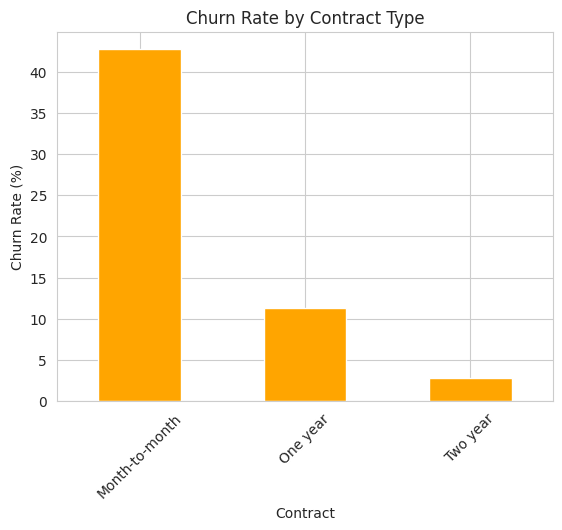

In [29]:
contract_churn.plot(kind='bar', color = 'orange')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()

## Tenure Analysis

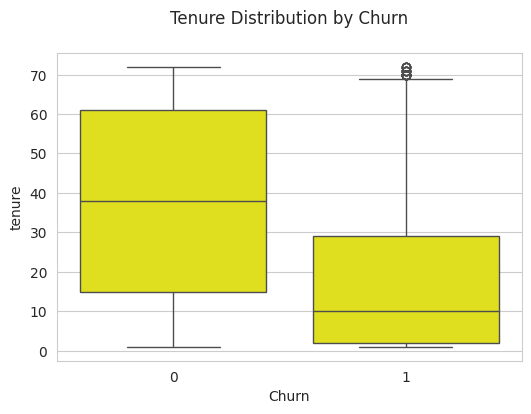

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df, color = 'yellow')
plt.title("Tenure Distribution by Churn\n")
plt.show()

## Monthly Charges Analysis

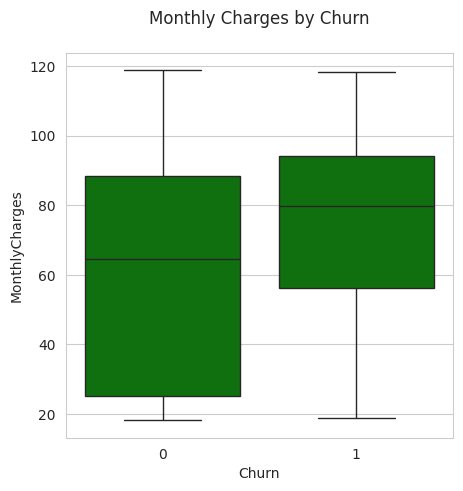

In [24]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, color = 'green')
plt.title("Monthly Charges by Churn\n")
plt.show()

## Churn by Payment Method

In [19]:
payment_churn = df.groupby('PaymentMethod')['Churn'].mean() * 100
payment_churn.sort_values(ascending=False)

,Churn
PaymentMethod,
Electronic check,45.285412
Mailed check,19.201995
Bank transfer (automatic),16.731518
Credit card (automatic),15.253123


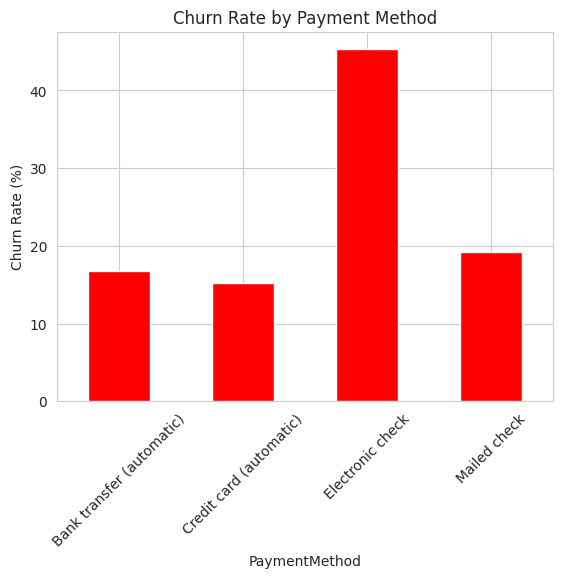

In [22]:
payment_churn.plot(kind='bar', color = 'red')
plt.title("Churn Rate by Payment Method")
plt.xticks(rotation=45)
plt.ylabel("Churn Rate (%)")
plt.show()

## Average Tenure by Churn

In [30]:
df.groupby('Churn')['tenure'].mean()

,tenure
Churn,
0,37.650010
1,17.979133


## Demographic Analysis – Senior Citizens

In [23]:
senior_churn = df.groupby('SeniorCitizen')['Churn'].mean() * 100
senior_churn

,Churn
SeniorCitizen,
0,23.650255
1,41.681261


# **Key Insights**

1. Customers with month-to-month contracts show significantly higher churn rates.
2. Customers with shorter tenure are more likely to churn.
3. Higher monthly charges are associated with increased churn probability.
4. Certain payment methods show elevated churn behavior.
5. Long-term contract customers demonstrate strong retention.

-----

# **Strategic Recommendations**

- Encourage customers to switch to long-term contracts through discounts or loyalty programs.
- Offer retention incentives for new customers during their first 6 months.
- Review pricing strategy for high monthly charge segments.
- Target high-risk payment method users with personalized engagement campaigns.

----

# **Conclusion**

The analysis identifies key behavioral and contractual factors influencing churn. Proactive retention strategies focused on high-risk segments can significantly reduce customer attrition and improve long-term profitability.

---